## News Analysis 
- Most Common Words
- Most Common Ngrams

##### Importing Libraries and Loading data

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm
pd.set_option('display.max_colwidth', -1)

/Users/feihuyan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [5]:
df1 = pd.read_csv('/Users/feihuyan/Downloads/news/articles1.csv')
df2 = pd.read_csv('/Users/feihuyan/Downloads/news/articles2.csv')
df3 = pd.read_csv('/Users/feihuyan/Downloads/news/articles3.csv')

In [6]:
df = pd.concat([df1, df2, df3])

In [7]:
set(df['publication'])

{'Atlantic',
 'Breitbart',
 'Business Insider',
 'Buzzfeed News',
 'CNN',
 'Fox News',
 'Guardian',
 'NPR',
 'National Review',
 'New York Post',
 'New York Times',
 'Reuters',
 'Talking Points Memo',
 'Vox',
 'Washington Post'}

In [8]:
bias = { 'Atlantic': 2,
         'Breitbart': 1,
         'Business Insider': 2,
         'Buzzfeed News': 2,
         'CNN': 0,
         'Fox News': 1,
         'Guardian': 2,
         'NPR': 2,
         'National Review': 2,
         'New York Post': 2,
         'New York Times': 0,
         'Reuters': 2,
         'Talking Points Memo': 2,
         'Vox': 2,
         'Washington Post': 2}
df['bias'] = df['publication'].map(bias)

In [ ]:
bias = { 'Atlantic': 0,
         'Breitbart': 1,
         'Business Insider': 2,
         'Buzzfeed News': 3,
         'CNN': 4,
         'Fox News': 5,
         'Guardian': 6,
         'NPR': 7,
         'National Review': 8,
         'New York Post': 9,
         'New York Times': 10,
         'Reuters': 11,
         'Talking Points Memo': 12,
         'Vox': 13,
         'Washington Post': 14}
df['bias'] = df['publication'].map(bias)

In [9]:
left = df[df['bias'] == 0]
right = df[df['bias'] == 1]

In [53]:
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict,Counter
import matplotlib.pyplot as plt
import seaborn as sns

stop = set(stopwords.words('english'))

## Most Common Words

In [26]:
word_list = []
lemmer = WordNetLemmatizer()
for row in tqdm(left['content']):
    words = [w for w in word_tokenize(row) if (w not in stop)]
    words = [lemmer.lemmatize(w) for w in words if (len(w) > 2)]
    word_list.append(words)
word_list = [word for l in word_list for word in l]
counter = Counter(word_list)
common_ = counter.most_common()
word = []
count = []
for common_word, word_count in common_:
    if common_word not in stop:
        word.append(common_word)
        count.append(word_count)

100%|██████████| 19291/19291 [02:20<00:00, 137.56it/s]


In [32]:
result = pd.DataFrame({'word':word, 'count':count})

In [33]:
result.head()

,word,count
0,said,141089
1,The,116594
2,Mr.,80036
3,Trump,67188
4,would,40916


In [41]:
def common_words_plot(df, political_affiliation, first_):
    word_list = []
    lemmer = WordNetLemmatizer()
    for row in tqdm(df):
        words = [w for w in word_tokenize(row) if (w not in stop)]
        words = [lemmer.lemmatize(w) for w in words if (len(w) > 2)]
        word_list.append(words)
    word_list = [word for l in word_list for word in l]
    counter = Counter(word_list)
    common_ = counter.most_common()
    word = []
    count = []
    for common_word, word_count in common_:
        if common_word not in stop:
            word.append(common_word)
            count.append(word_count)
    plt.figure(figsize=(15,9))
    sns.barplot(word[:first_], count[:first_]).set_title(f'Most Common Words from the {political_affiliation}',fontsize=20)
    plt.xlabel("Words",fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel("Counts",fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

100%|██████████| 19291/19291 [02:22<00:00, 135.36it/s]


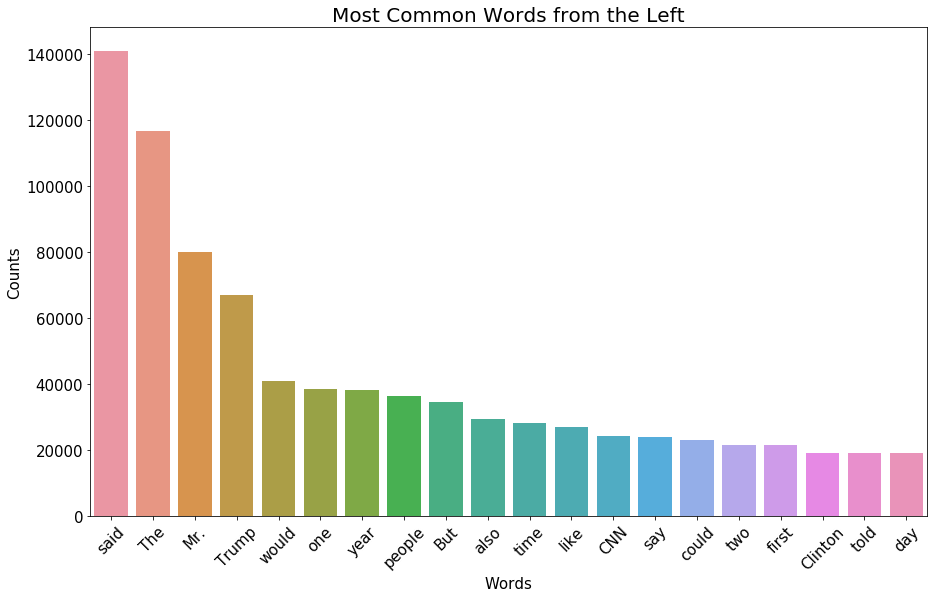

In [44]:
common_words_plot(left['content'], 'CNN', 20)

100%|██████████| 28135/28135 [02:04<00:00, 225.74it/s]


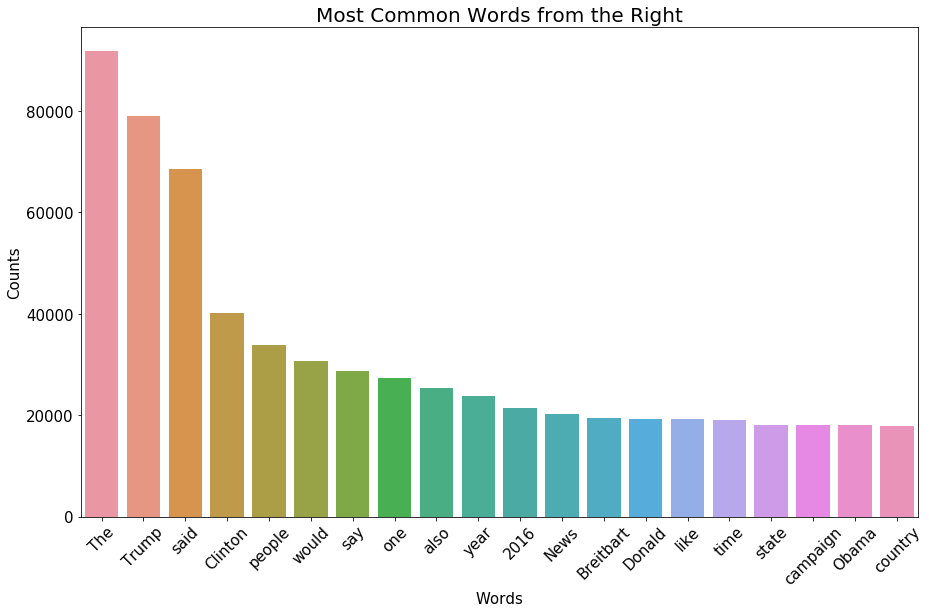

In [43]:
common_words_plot(right['content'], 'Fox', 20)

## Most Common Ngrams

In [51]:
def n_gram_plot(df, n, political_affiliation, first_):
    print('vectorizing...')
    vec = CountVectorizer(ngram_range=(n, n),stop_words=stop).fit(df)
    print('transforming...')
    bag_of_words = vec.transform(df)
    sum_words = bag_of_words.sum(axis=0)
    print('building frequency...')
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    x,y=map(list,zip(*words_freq))
    grams = 'Bigrams'
    if n == 3: grams = 'Trigrams'
    if n == 4: grams = 'Quadgrams'
    print('plotting...')
    plt.figure(figsize=(15,9))
    sns.barplot(x[:first_],y[:first_],palette="GnBu_d").set_title(f'Most Common {grams} from the {political_affiliation}',fontsize=20)
    plt.xlabel("Bigrams",fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel("Counts",fontsize=15)
    plt.yticks(fontsize=15)
    plt.xticks(rotation=45)
    plt.show()

vectorizing...
transforming...
building frequency...
plotting...


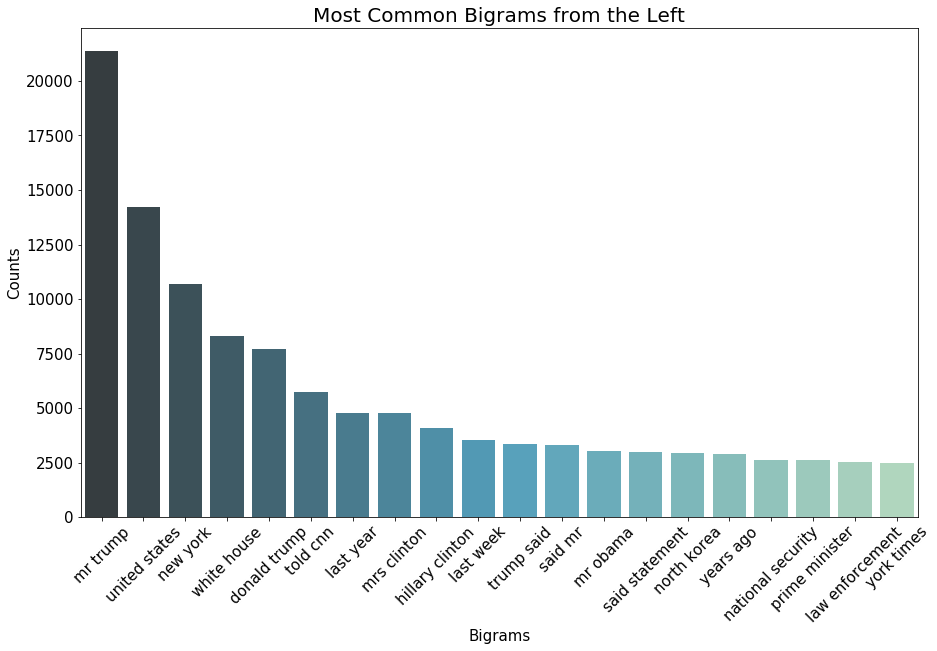

In [54]:
n_gram_plot(left['content'], 2, 'CNN', 20)

vectorizing...
transforming...
building frequency...
plotting...


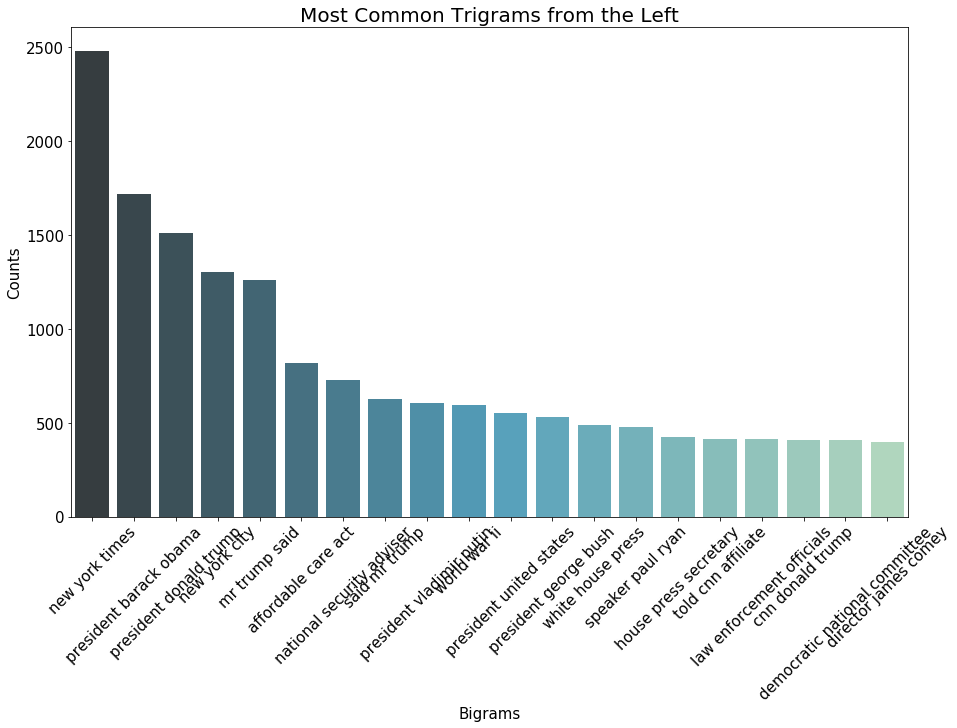

In [55]:
n_gram_plot(left['content'], 3, 'CNN', 20)

vectorizing...
transforming...
building frequency...
plotting...


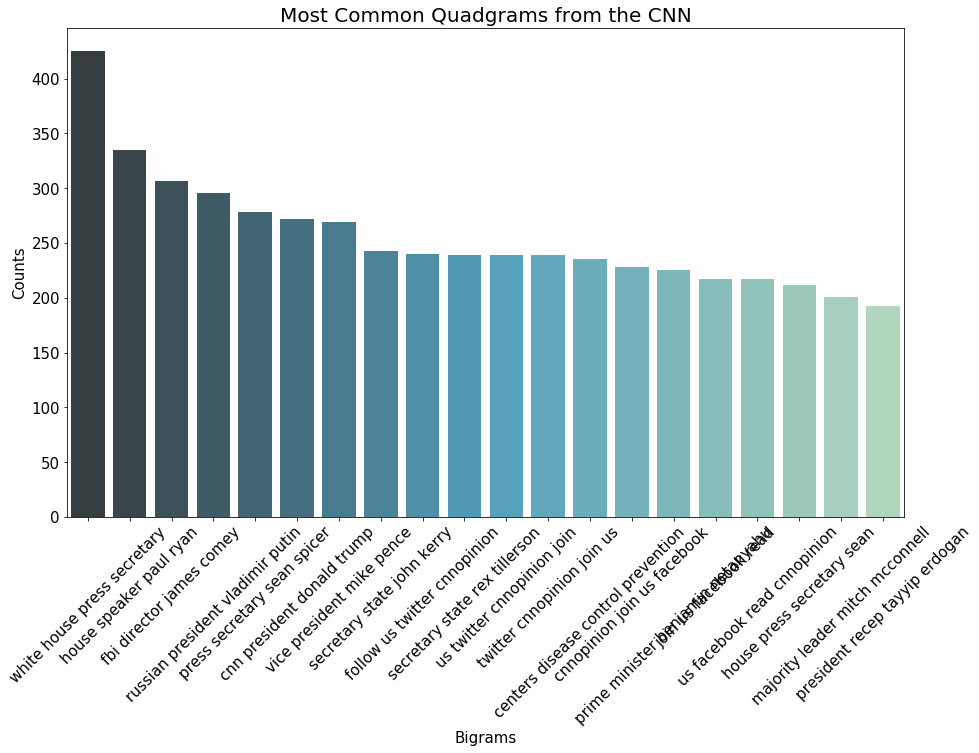

In [56]:
n_gram_plot(left['content'], 4, 'CNN', 20)

vectorizing...
transforming...
building frequency...
plotting...


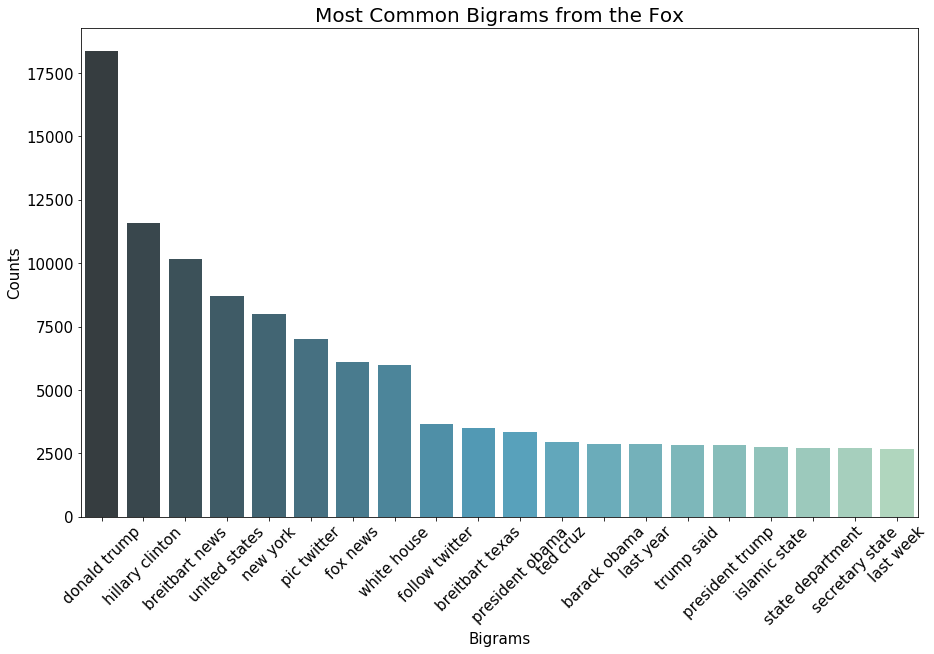

In [57]:
n_gram_plot(right['content'], 2, 'Fox', 20)

vectorizing...
transforming...
building frequency...
plotting...


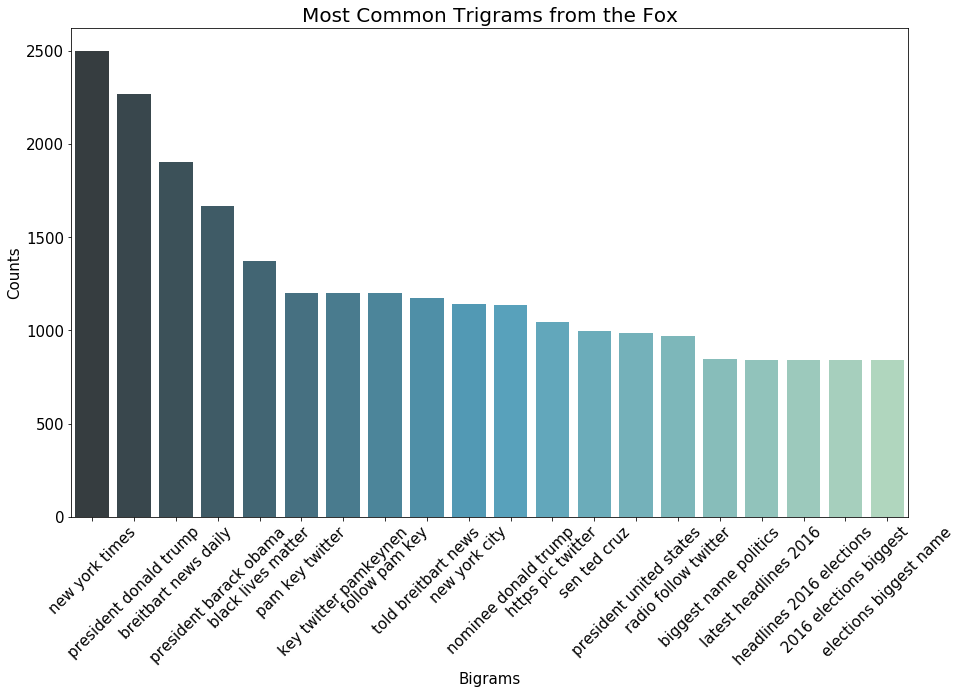

In [58]:
n_gram_plot(right['content'], 3, 'Fox', 20)

vectorizing...
transforming...
building frequency...
plotting...


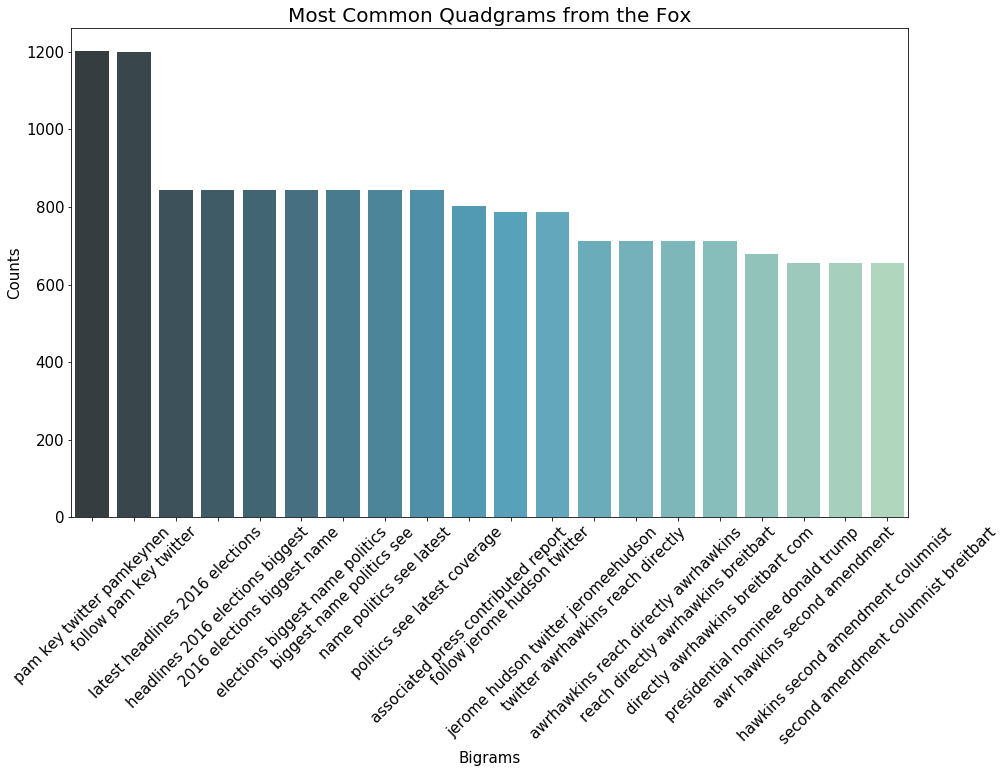

In [59]:
n_gram_plot(right['content'], 4, 'Fox', 20)